In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
import seaborn as sns

In [6]:
df['Outcome'] = np.where(df['Outcome']==1,'Diabetic','Non-Diabetic')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


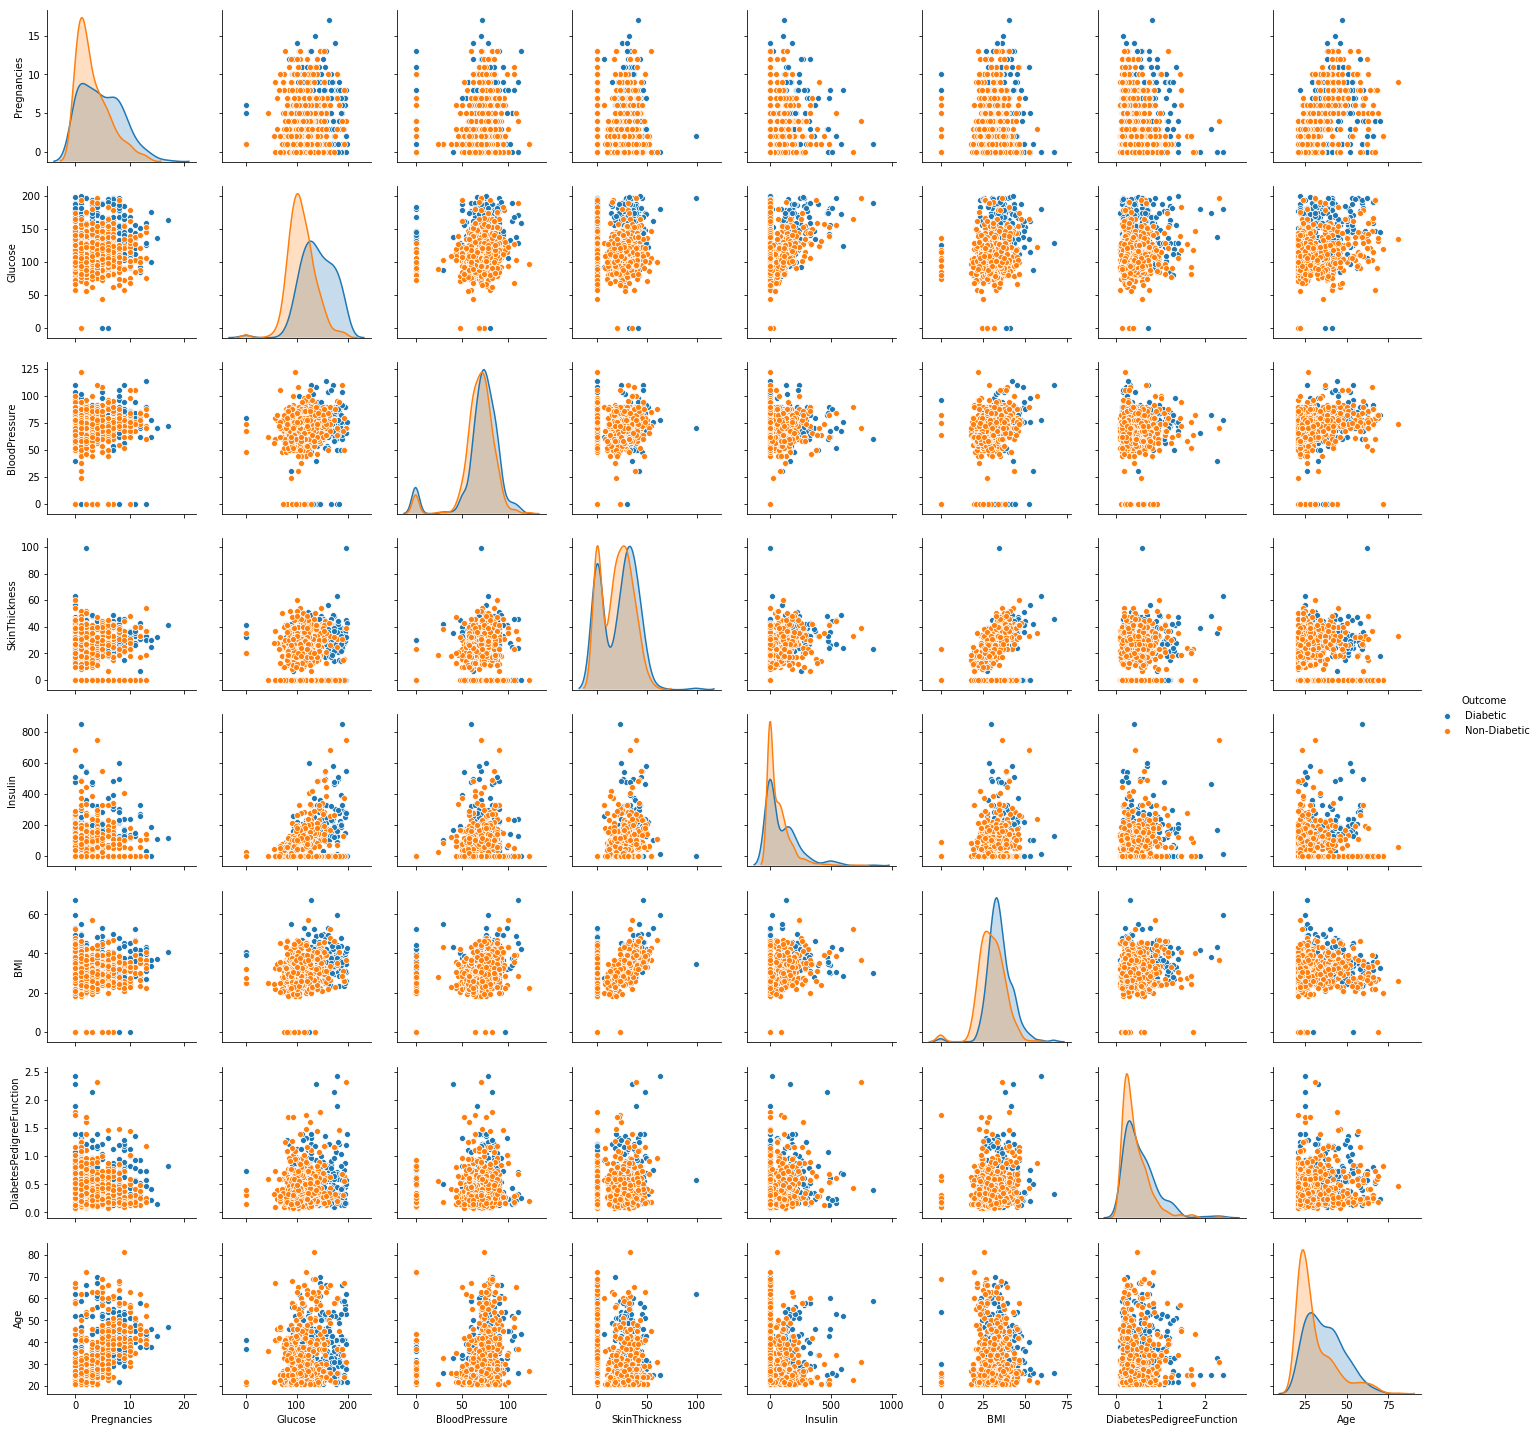

In [7]:
sns.pairplot(df,hue='Outcome')

In [12]:
df = pd.read_csv('diabetes.csv')

In [13]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [15]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
df.shape

(768, 9)

In [17]:
## creating model

class ANN_model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out= nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x) )
        x=F.relu(self.f_connected2(x) )
        x=self.out(x)
        return x

In [18]:
## instantiate ANN model
torch.manual_seed(20)

model = ANN_model()

In [19]:
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [20]:
## backward propagation - define loss func and optimizer

loss_function= nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)

In [21]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019211888313293
Epoch number: 21 and the loss : 0.6090323328971863
Epoch number: 31 and the loss : 0.5917772054672241
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529041290283203
Epoch number: 61 and the loss : 0.5410096049308777
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135971307754517
Epoch number: 101 and the loss : 0.5061255693435669
Epoch number: 111 and the loss : 0.4983412027359009
Epoch number: 121 and the loss : 0.4960547685623169
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.47560378909111023
Epoch number: 151 and the loss : 0.47992369532585144
Epoch number: 161 and the loss : 0.4792938232421875
Epoch number: 171 and the loss : 0.4649999141693115
Epoch number: 181 and the loss : 0.458202600479126
Epoch number: 191 and t

In [24]:

### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

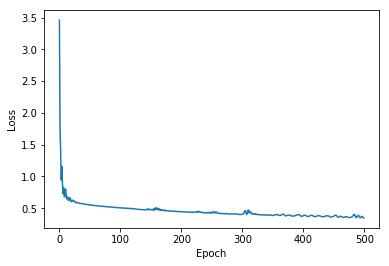

In [25]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [31]:
predictions = []
with torch.no_grad():
    for i , data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

In [32]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [33]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[93, 14],
       [18, 29]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

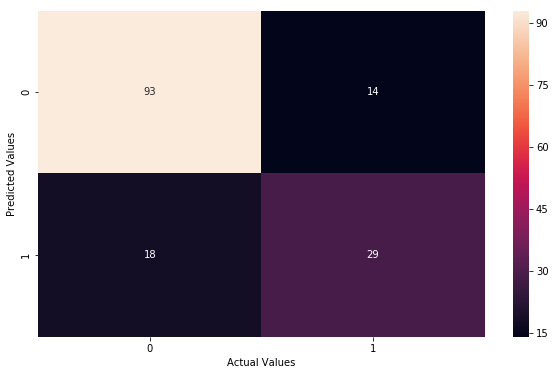

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [35]:

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7922077922077922

In [36]:
torch.save(model,'diabetes.pt')

C:\Users\Neeraj Bhadani\Anaconda3\envs\envpytorch\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [37]:
model=torch.load('diabetes.pt')


In [38]:

model.eval()

ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [41]:
### Predcition of new data point
list(df.iloc[0,:-1])
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

new_data=torch.tensor(lst1)
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.2133, 1.1058])
0
